CSCN8010 Lab 1: 

Name: Daya Meenakshi Bala Subbu

ID: 8964370

Submission Date: 02 FEB 2025

Program Code: CSCN8010

Program Name: Foundations of Machine Learning Frameworks

Univariate Linear Regression on the California Housing Prices Dataset

References:
https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [65]:
# Steps:
# 1. Framing the Problem - Describe the goal of this report (0.5 point)
print("The Goal of this report is to train the three univariate Linear regression models to predict the median house value using income, population and number of houshold.")

The Goal of this report is to train the three univariate Linear regression models to predict the median house value using income, population and number of houshold.


In [66]:
#2. Getting the Data - hyperlink to the source (0.25 point) and load into Pandas (0.25 point).

#importing all the required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate

#loading the dataset
data_frame=pd.read_csv("./housing.csv")
#Getting the data from the hyperlink to the source
print("Dataset Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices")
print(data_frame.head())

#Note: The loaded dataset might have the missing values, duplicates and outliers. But I am proceeding without preprocessing the data.
#Proceeding with the steps with noise using the current provided dataset.

Dataset Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NE

In [67]:
# 3. Exploratory Data Analysis (EDA) (2 points):
# 3.1. Explore statistics (e.g. using Pandas `describe` function) 
print(data_frame.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

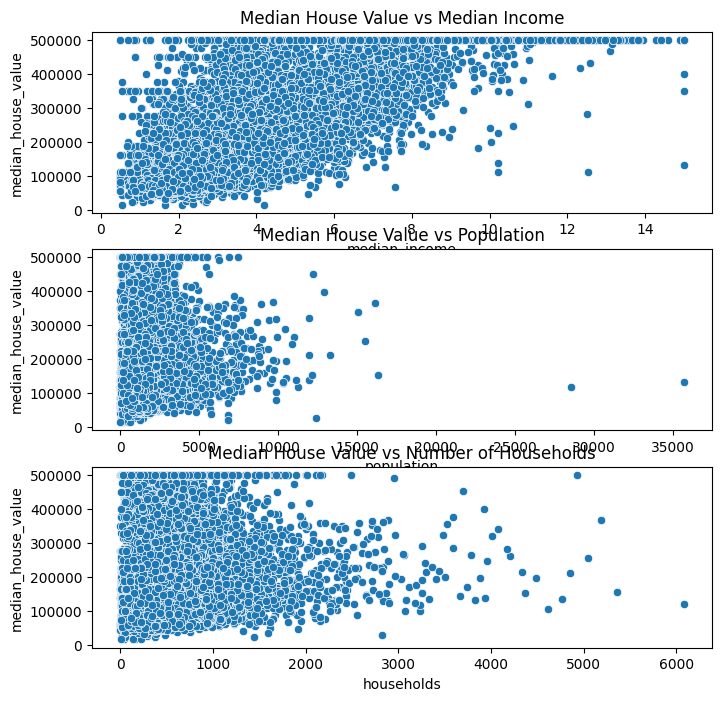

In [80]:
# 3.2. Create three Seaborn scatter plots of median house value vs. median income, population and number of households. 
# There should be one scatter plot per each independent variable. 
# Add a title to each graph (using Seaborn). 
# Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next. (1 point).

# ii. Scatter Plots
pt.figure(figsize=(10, 8))
#Scatter plot for Median House Value vs Median Income
pt.subplot(3, 1, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=data_frame)
pt.title('Median House Value vs Median Income')
pt.tight_layout()
#Scatter plot for Median House Value vs Population
pt.subplot(3, 1, 2) 
sns.scatterplot(x='population', y='median_house_value', data=data_frame)
pt.title('Median House Value vs Population')
pt.tight_layout()
#Scatter plot for Median House Value vs Number of Households
pt.subplot(3, 1, 3) 
sns.scatterplot(x='households', y='median_house_value', data=data_frame)
pt.title('Median House Value vs Number of Households')
pt.tight_layout()
#Displaying all the data in a scatter plots
pt.show()


In [69]:
# 3.3 Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant (1 point).

print("1. The median house value shows the median price of the house in the area within the range between 14,999 to 500000 dollars. So we used as a target variable in our regression model.")
print("2. The Median income ranges between 0.5 to 15 shows the median household income in the area. This shows the strongest predictor of house value in the dataset.")
print("3. The total number of people living in the area represents the population which ranges between 3 to 35,600 in the graph. So it is considered as the no correlation with the house value.")
print("4. The number of households shows the total housing units in the area. The range is from 1 to 6000 approximately. It has the weak positive correlation with the house value.")


1. The median house value shows the median price of the house in the area within the range between 14,999 to 500000 dollars. So we used as a target variable in our regression model.
2. The Median income ranges between 0.5 to 15 shows the median household income in the area. This shows the strongest predictor of house value in the dataset.
3. The total number of people living in the area represents the population which ranges between 3 to 35,600 in the graph. So it is considered as the no correlation with the house value.
4. The number of households shows the total housing units in the area. The range is from 1 to 6000 approximately. It has the weak positive correlation with the house value.


In [70]:
#4. Run three linear regressions (fitting) between (1.5 point):
#4.1 median house value vs. median income
x1_income=data_frame['median_income'].values.reshape(-1,1)
y=data_frame['median_house_value'].values
m_income=LinearRegression().fit(x1_income, y)

#4.2 median house value vs. population
x2_population=data_frame['population'].values.reshape(-1,1)
y=data_frame['median_house_value'].values
m_population=LinearRegression().fit(x2_population, y)

#4.3 median house value vs. number of households
x3_households=data_frame['households'].values.reshape(-1,1)
y=data_frame['median_house_value'].values
m_households=LinearRegression().fit(x3_households, y)

#The fitted linear regression model has been created for median income, population and households.



In [71]:
# 5. In a single table for all three linear regressions, provide per regression model (1.5 points):
# 5.1 intercept and slope (0.5 point)
# 5.2 Mean Squared Error (0.5 point)
# 5.3 Mean Absolute Error (0.5 point)

output = {
    'm_model': ['Median Income', 'Population', 'Households'],
    'Intercept': [m_income.intercept_, m_population.intercept_, m_households.intercept_],
    'Slope': [m_income.coef_[0], m_population.coef_[0], m_households.coef_[0]],
    'Mean_squared_error': [mean_squared_error(data_frame['median_house_value'], m_income.predict(x1_income)),
            mean_squared_error(data_frame['median_house_value'], m_population.predict(x2_population)),
            mean_squared_error(data_frame['median_house_value'], m_households.predict(x3_households))],
    'Mean_absolute_error': [mean_absolute_error(data_frame['median_house_value'], m_income.predict(x1_income)),
            mean_absolute_error(data_frame['median_house_value'], m_population.predict(x2_population)),
            mean_absolute_error(data_frame['median_house_value'], m_households.predict(x3_households))],
        }
#In a single table final output for all three regression models
final_dataframe = pd.DataFrame(output)
print(final_dataframe)
print(tabulate(final_dataframe, headers="keys", tablefmt="grid"))

         m_model      Intercept         Slope  Mean_squared_error  \
0  Median Income   45085.576703  41793.849202        7.011312e+09   
1     Population  210436.262076     -2.511753        1.330741e+10   
2     Households  196928.577162     19.872775        1.325778e+10   

   Mean_absolute_error  
0         62625.933791  
1         91153.820095  
2         90802.743243  
+----+---------------+-------------+-------------+----------------------+-----------------------+
|    | m_model       |   Intercept |       Slope |   Mean_squared_error |   Mean_absolute_error |
+====+===============+=============+=============+======================+=======================+
|  0 | Median Income |     45085.6 | 41793.8     |          7.01131e+09 |               62625.9 |
+----+---------------+-------------+-------------+----------------------+-----------------------+
|  1 | Population    |    210436   |    -2.51175 |          1.33074e+10 |               91153.8 |
+----+---------------+-------------

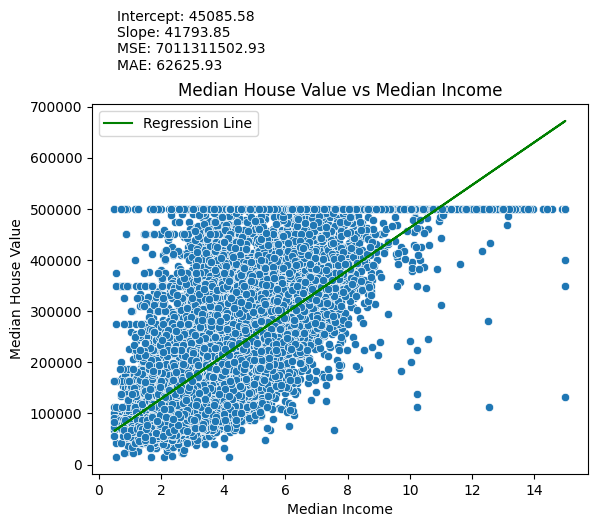

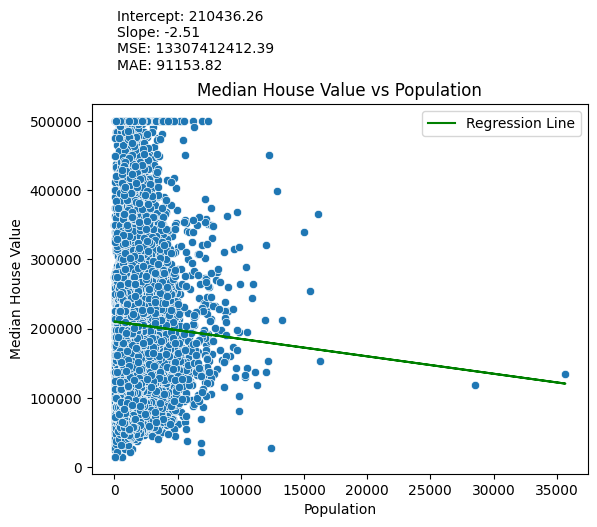

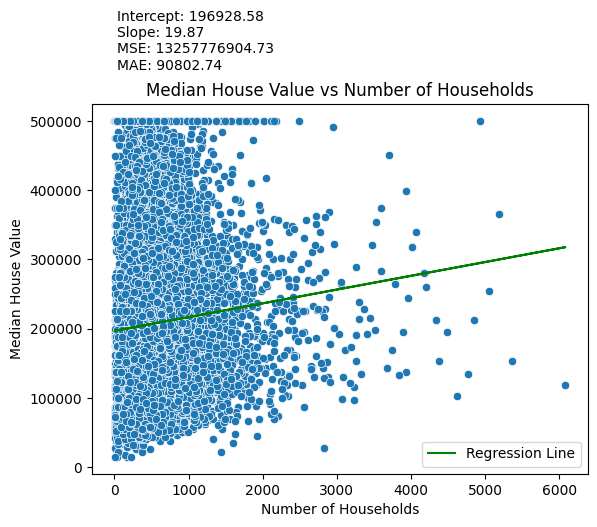

In [72]:
#6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly)  (2 point)

# Plotting the scatter data for Median Income Model
pt.figure()  
sns.scatterplot(x=data_frame['median_income'], y=data_frame['median_house_value'])
y1_income=m_income.predict(x1_income)  
pt.plot(data_frame['median_income'], y1_income, color='green', label='Regression Line')  
intercept_income=m_income.intercept_
slope_income=m_income.coef_[0]
mse_income=mean_squared_error(data_frame['median_house_value'], y1_income)
mae_income=mean_absolute_error(data_frame['median_house_value'], y1_income)
pt.text(0.05, 1.05, f'Intercept: {intercept_income:.2f}\nSlope: {slope_income:.2f}\nMSE: {mse_income:.2f}\nMAE: {mae_income:.2f}\n', transform=pt.gca().transAxes)
pt.title('Median House Value vs Median Income')
pt.xlabel('Median Income')
pt.ylabel('Median House Value')
pt.legend()
pt.show()

# Plotting the scatter data for Population Model
pt.figure()  
sns.scatterplot(x=data_frame['population'], y=data_frame['median_house_value'])
y1_population=m_population.predict(x2_population)
pt.plot(data_frame['population'], y1_population, color='green', label='Regression Line')
intercept_population=m_population.intercept_
slope_population=m_population.coef_[0]
mse_population=mean_squared_error(data_frame['median_house_value'], y1_population)
mae_population=mean_absolute_error(data_frame['median_house_value'], y1_population)
pt.text(0.05, 1.05, f'Intercept: {intercept_population:.2f}\nSlope: {slope_population:.2f}\nMSE: {mse_population:.2f}\nMAE: {mae_population:.2f}\n', transform=pt.gca().transAxes)
pt.title('Median House Value vs Population')
pt.xlabel('Population')
pt.ylabel('Median House Value')
pt.legend()
pt.show()

# Plotting the scatter data for Households Model
pt.figure()  
sns.scatterplot(x=data_frame['households'], y=data_frame['median_house_value'])
y1_households=m_households.predict(x3_households)
pt.plot(data_frame['households'], y1_households, color='green', label='Regression Line')
intercept_households=m_households.intercept_
slope_households=m_households.coef_[0]
mse_households=mean_squared_error(data_frame['median_house_value'], y1_households)
mae_households=mean_absolute_error(data_frame['median_house_value'], y1_households)
pt.text(0.05, 1.05, f'Intercept: {intercept_households:.2f}\nSlope: {slope_households:.2f}\nMSE: {mse_households:.2f}\nMAE: {mae_households:.2f}\n', transform=pt.gca().transAxes)
pt.title('Median House Value vs Number of Households')
pt.xlabel('Number of Households')
pt.ylabel('Median House Value')
pt.legend()
pt.show()


In [73]:

# 7. Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed (1 point)
print("Summary of the model:")
print("When comparing the three regression model the best fit would be the median income with the lowest of mean squared error and mean absolute error. The population and number of households shows the weaker relation with the median house value.")


Summary of the model:
When comparing the three regression model the best fit would be the median income with the lowest of mean squared error and mean absolute error. The population and number of households shows the weaker relation with the median house value.
